# 1. Data Preparation

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
data.shape

(1030, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### Observations:
 1. All of the data in the dataset is numerical, no categorical data types present.
 2. No null/NAN data.
 3. Age data appears to have outliers because max value is very large as compared to 3rd IQR value.

# 2. Exploratory Data Analytics
## 2.1 Univariate Analysis
Let's check the nature and shape of the distribution of the individual predictors.

In [7]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_mean = data[x].mean()
    x_std = data[x].std()
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(Mean) : {round(x_mean, 3)}\n'
          f'{x.capitalize()}(Standard Deviation) : {round(x_std, 3)}\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Cement Attribute:
Cement(Mean) : 281.168
Cement(Standard Deviation) : 104.506
Cement(min) : 102.0
Q1                    : 192.375
Q2(Median)            : 272.9
Q3                    : 350.0
Cement(max) : 540.0


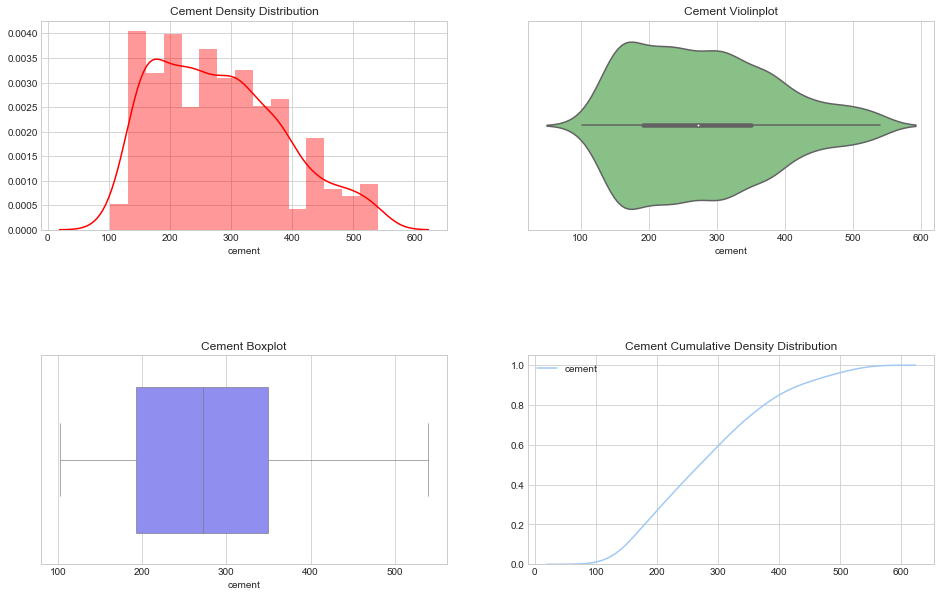

In [8]:
summary('cement')

#### Observation:
 1. Cement is uniformly distributed with a median of 272.9 kg/$m^{3}$ mixture.
 2. There are no outlier values.

5 Point Summary of Slag Attribute:
Slag(Mean) : 73.896
Slag(Standard Deviation) : 86.279
Slag(min) : 0.0
Q1                    : 0.0
Q2(Median)            : 22.0
Q3                    : 142.95
Slag(max) : 359.4


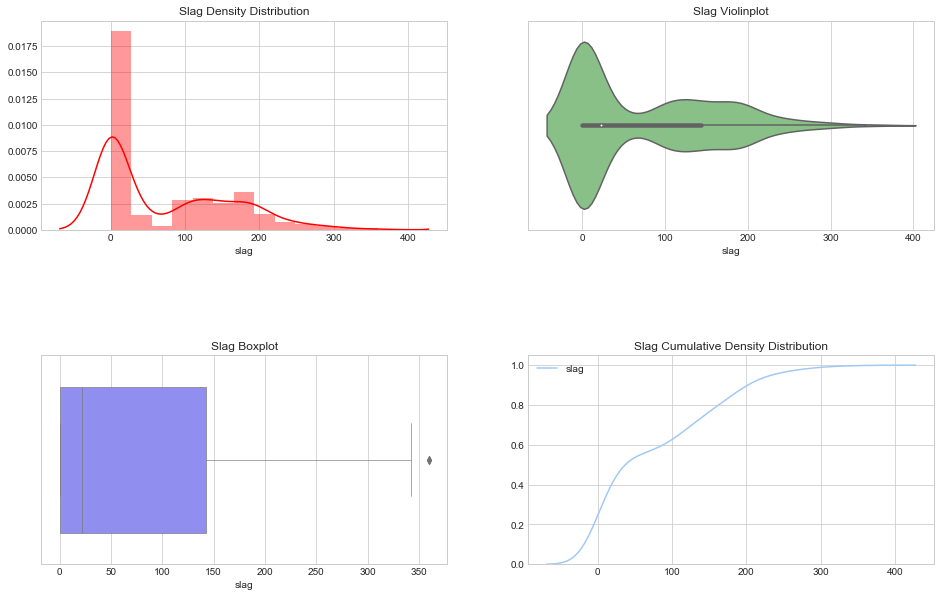

In [9]:
summary('slag')

#### Observation:
 1. The distribution of Slag values is left skewed with a median value of 22.0 kg/$m^{3}$.
 2. There are outlier values in the right tail of the distribution.

5 Point Summary of Ash Attribute:
Ash(Mean) : 54.188
Ash(Standard Deviation) : 63.997
Ash(min) : 0.0
Q1                    : 0.0
Q2(Median)            : 0.0
Q3                    : 118.3
Ash(max) : 200.1


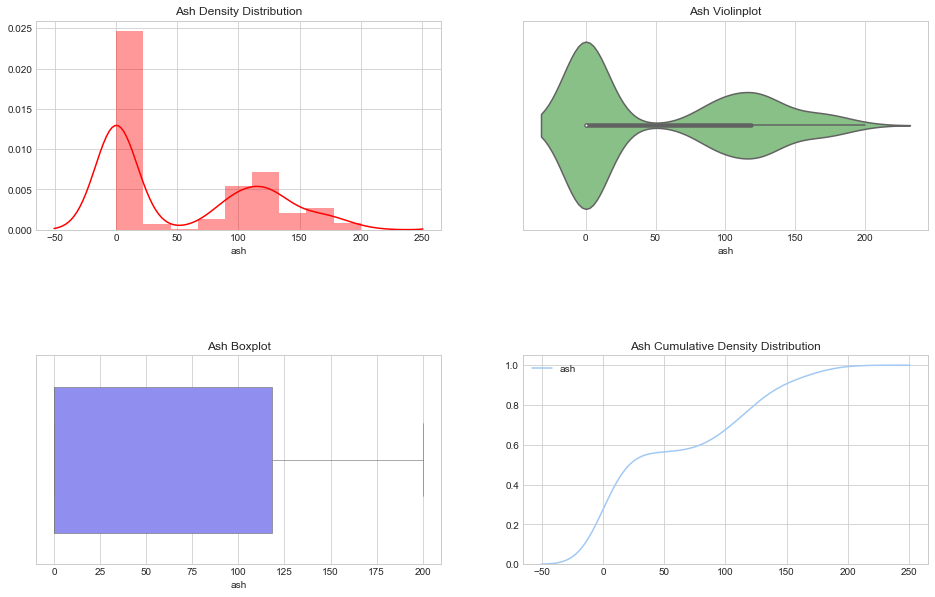

In [10]:
summary('ash')

#### Observation:
 1. The distribution of Ash values is distinctly bi-modal and left skewed with a median value of 0.0 kg/$m^{3}$.
 2. There are no outlier values in the distribution.

5 Point Summary of Water Attribute:
Water(Mean) : 181.567
Water(Standard Deviation) : 21.354
Water(min) : 121.8
Q1                    : 164.9
Q2(Median)            : 185.0
Q3                    : 192.0
Water(max) : 247.0


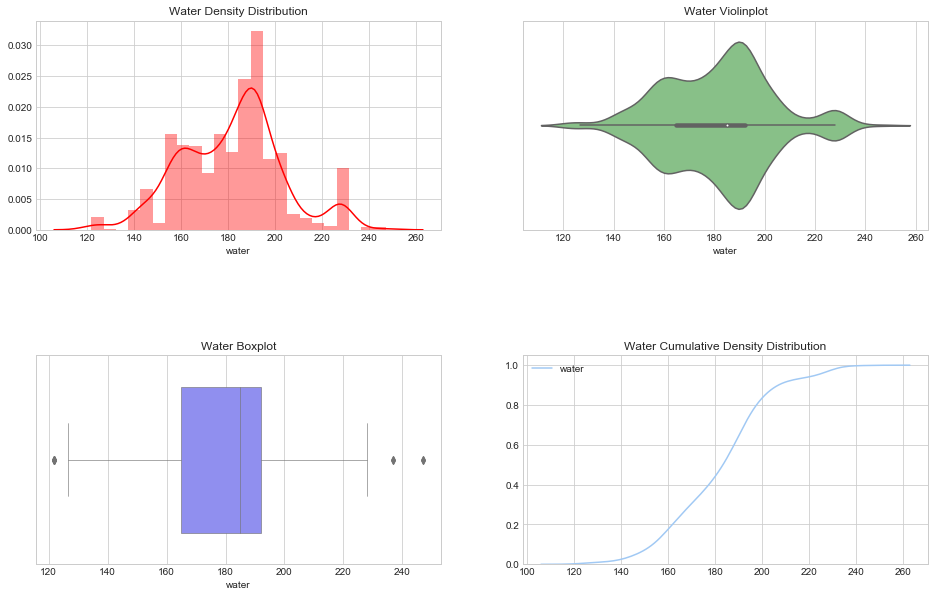

In [11]:
summary('water')

#### Observation:
 1. The distribution of Water values is uneven with a median value of 185.0 kg/$m^{3}$.
 2. There are outlier values in both tails of the distribution.

5 Point Summary of Superplastic Attribute:
Superplastic(Mean) : 6.205
Superplastic(Standard Deviation) : 5.974
Superplastic(min) : 0.0
Q1                    : 0.0
Q2(Median)            : 6.4
Q3                    : 10.2
Superplastic(max) : 32.2


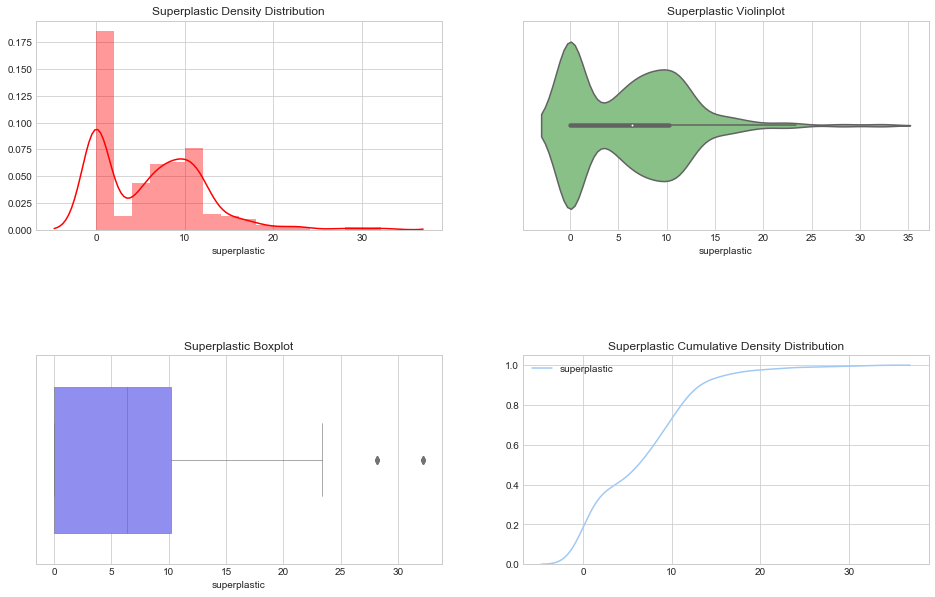

In [12]:
summary('superplastic')

#### Observation:
 1. The distribution of Superplastic values is distinctly bi-modal and left skewed with a median value of 6.4 kg/$m^{3}$.
 2. There are outlier values in the right tail of the distribution.

5 Point Summary of Coarseagg Attribute:
Coarseagg(Mean) : 972.919
Coarseagg(Standard Deviation) : 77.754
Coarseagg(min) : 801.0
Q1                    : 932.0
Q2(Median)            : 968.0
Q3                    : 1029.4
Coarseagg(max) : 1145.0


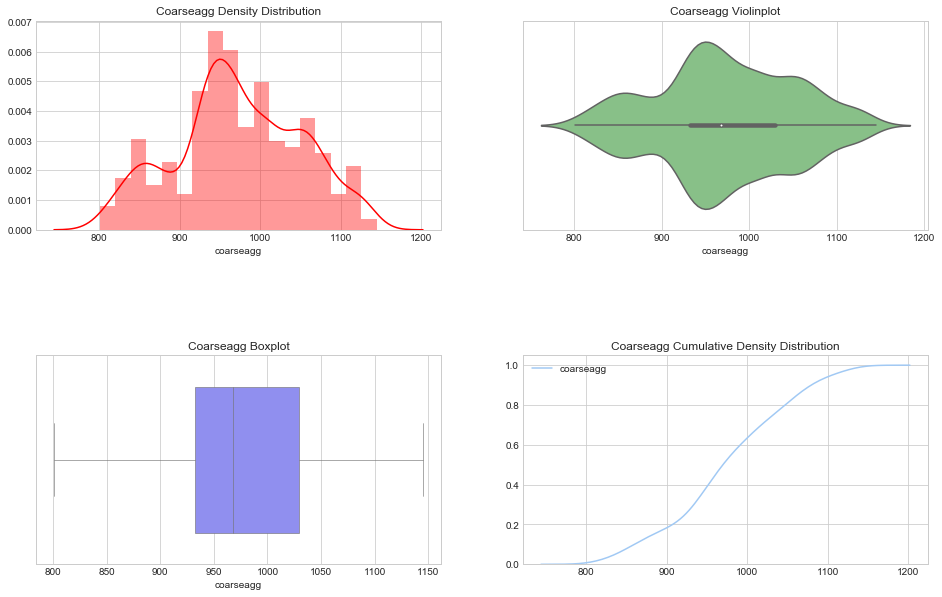

In [13]:
summary('coarseagg')

#### Observation:
 1. The distribution of Coarseagg values is uneven with a median value of 968.0 kg/$m^{3}$.
 2. There are no outlier values in the distribution.

5 Point Summary of Fineagg Attribute:
Fineagg(Mean) : 773.58
Fineagg(Standard Deviation) : 80.176
Fineagg(min) : 594.0
Q1                    : 730.9499999999999
Q2(Median)            : 779.5
Q3                    : 824.0
Fineagg(max) : 992.6


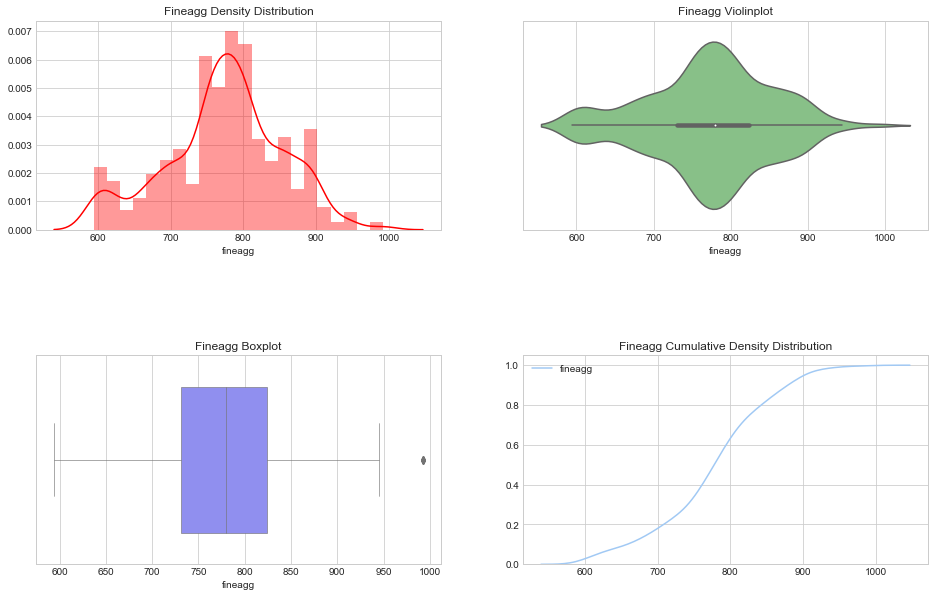

In [14]:
summary('fineagg')

#### Observation:
 1. The distribution of Fineagg values is uneven with a median value of 779.5 kg/$m^{3}$.
 2. There are outlier values in the right tail of distribution.

5 Point Summary of Age Attribute:
Age(Mean) : 45.662
Age(Standard Deviation) : 63.17
Age(min) : 1
Q1                    : 7.0
Q2(Median)            : 28.0
Q3                    : 56.0
Age(max) : 365


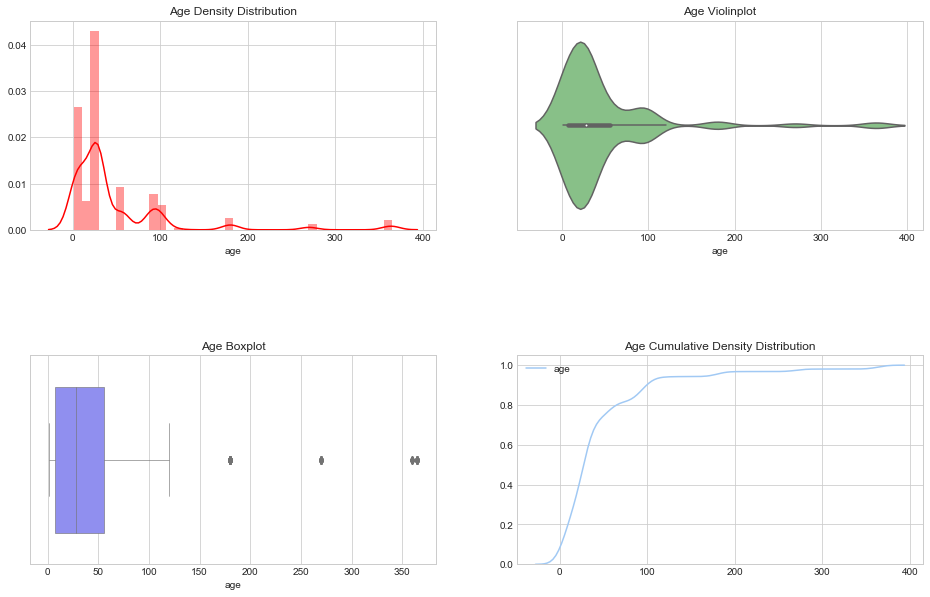

In [15]:
summary('age')

#### Observation:
 1. The distribution of Age values is extremely left skewed with a median value of 28 Days.
 2. There are a lot of outlier values in the right tail of the distribution.

### Box Plot Distribution of all variables

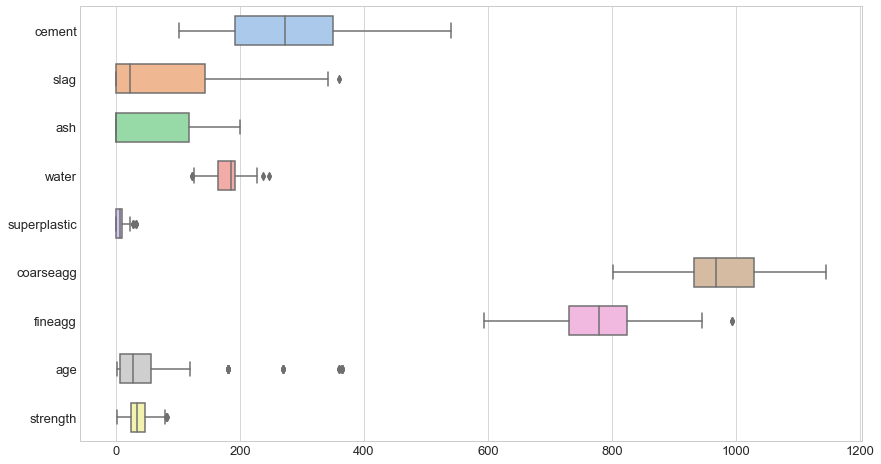

In [16]:
plt.figure(figsize=(14,8))
b = sns.boxplot(data=data, width=0.6, orient='h')
# b.set_yticklabels(labels = data.columns, size = 12);
b.tick_params(labelsize=13);

### Distribution of the Target variable (Strength)

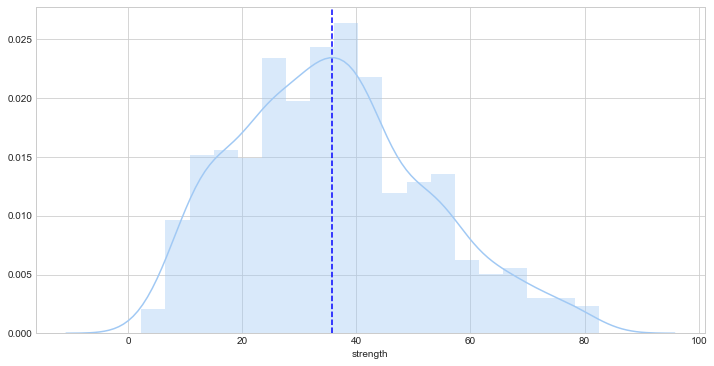

In [17]:
fig = plt.figure(figsize=(12, 6))
plt.axvline(data.strength.mean(),linestyle="dashed",label="mean", color='blue')
sns.distplot(data.strength);

## 2.2. Multi-variate Analysis

In [18]:
from IPython.display import Image
#First, let us analyze pairwise correlation between different predictor attributes.
# sns_plot = sns.pairplot(data, diag_kind='kde')
# sns_plot.savefig("pairplot.png")
# plt.clf()

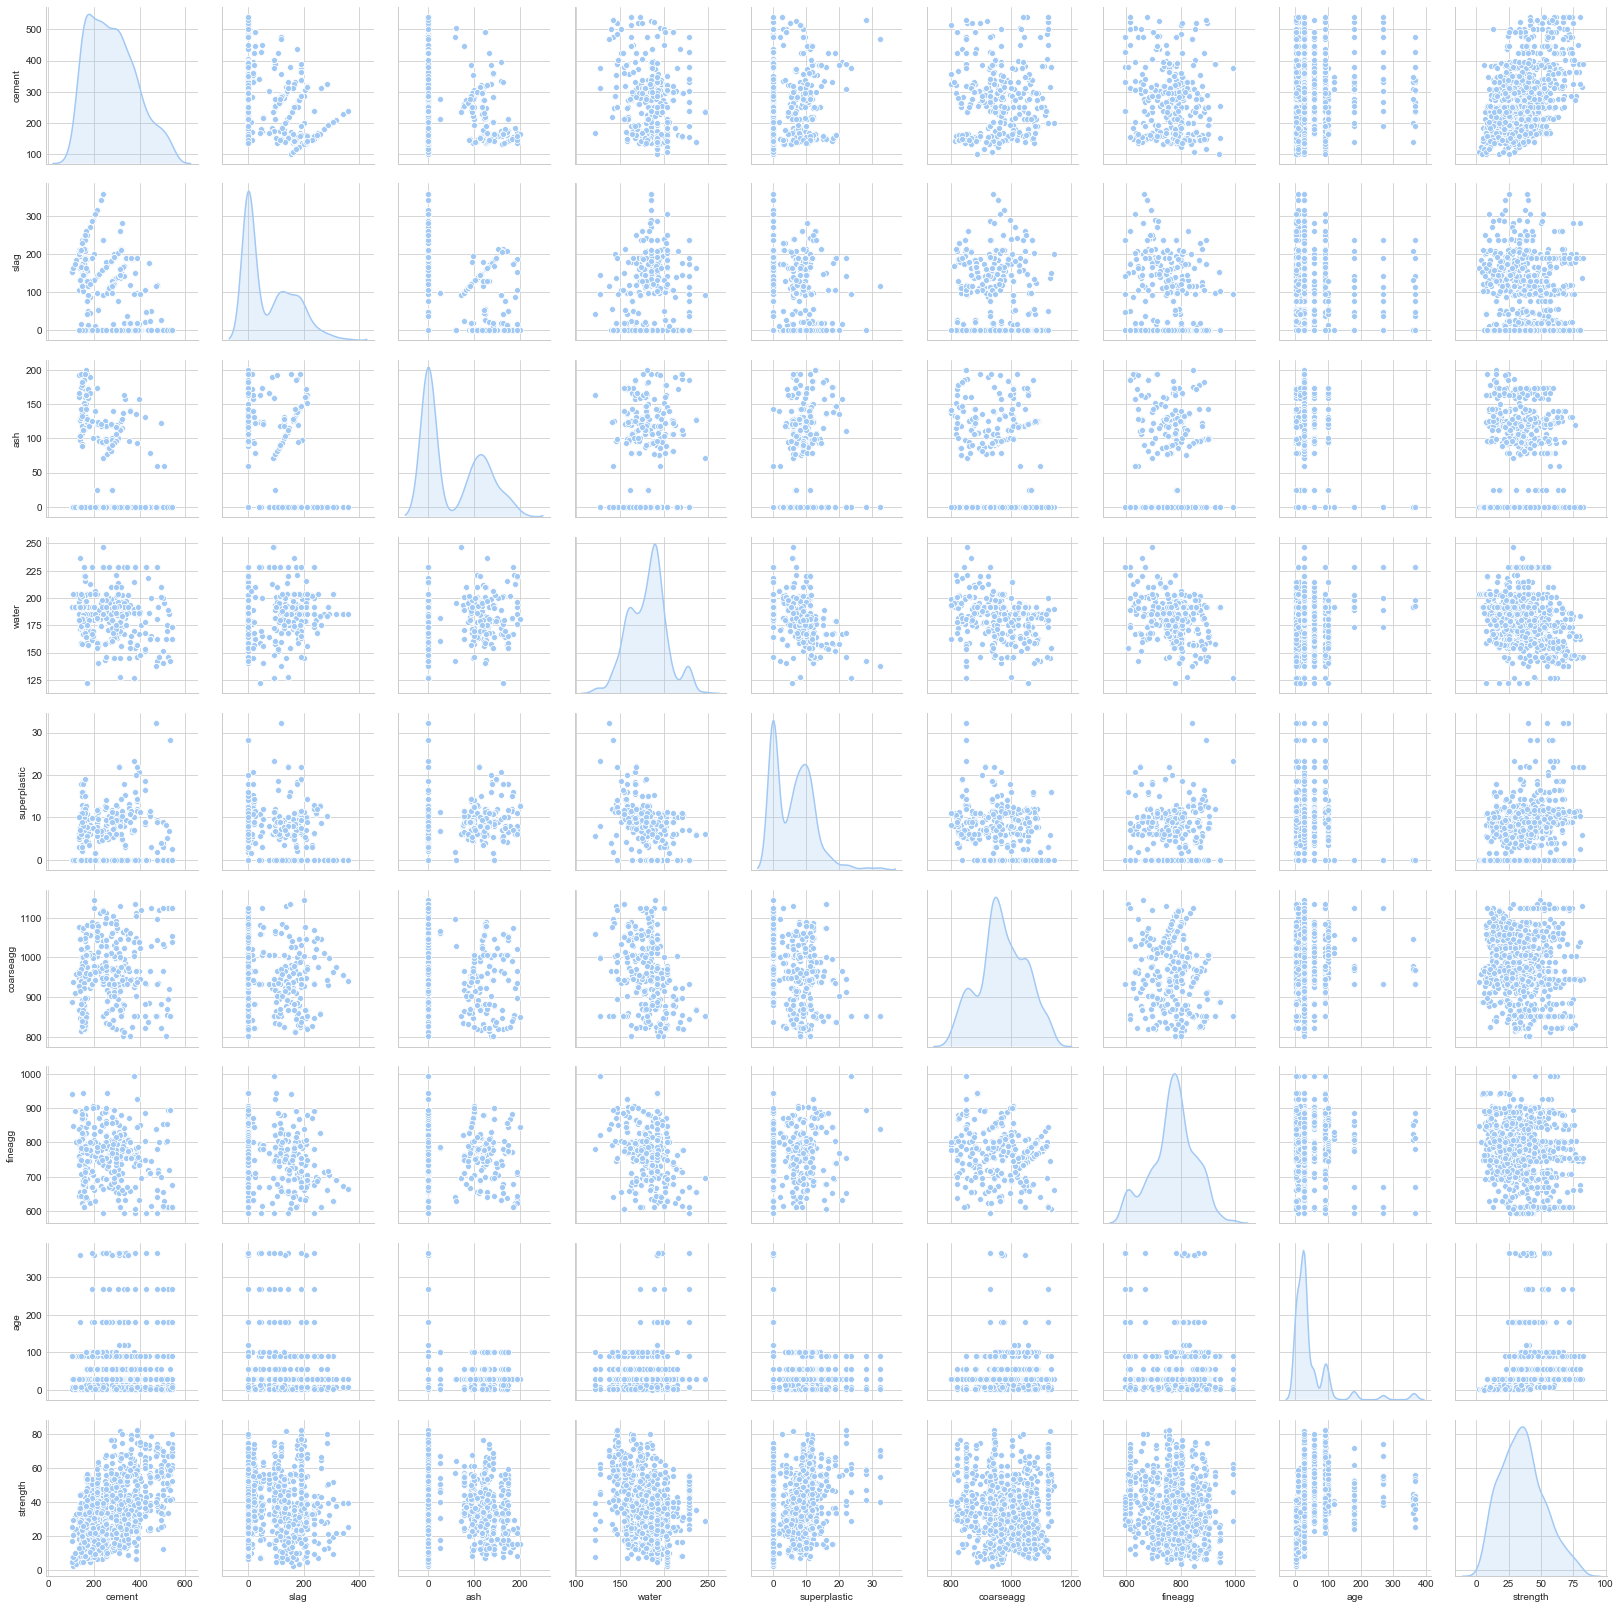

In [19]:
Image(filename='pairplot.png')

### Observations
#### Diagonal analysis + dist plots analysis

 - Distribution of cement appears nearly normal
 - Slag and ash has 2 gaussians and is skewed
 - Water and Superplastic have near normal distributions
 - Age data has long tail which confirms the presence of outliers
 - Strength is approximately normally distributed
 
#### Off-diagonal analysis with strength

 - Cement has strong correlation with strength
 - Slag is a very weak predictor because the distribution is like a cloud
 - ash, coarseagg and fineagg are also weak predictors
 - Water appears to have a negative correlation with strength
 - Superplastic appears to have positive correlation with strength
 - age also has strong correlation with strength
 
#### Off-diagonal analysis between other features

 - Cement and slag have strong correlation
 - Water and super plastic have strong negative correlation

### Correlation Heat Map

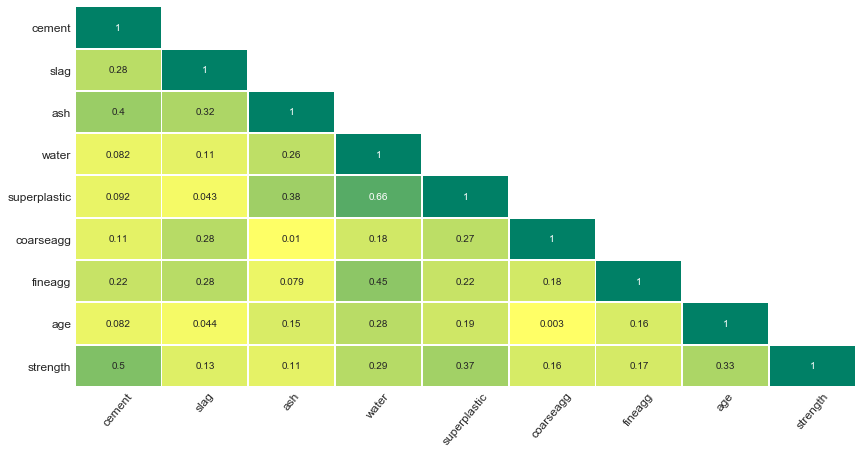

In [20]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=0).astype(np.bool))

mask = lower == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (14,7))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
g = sns.heatmap(lower, center=0.5, cmap= 'summer_r', annot= True, xticklabels = corr_matrix.index, 
                yticklabels = corr_matrix.columns, cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
g.tick_params(labelsize=12)
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.show()

### Observations
 - As expected, cement and age have strong correlation with strength
 - Super plastic has mild positive correlation with strength
 - As expected, water and superplastic have strong correlation

### 3D Plot of 2 most important features (Cement and Superplastic) and the target

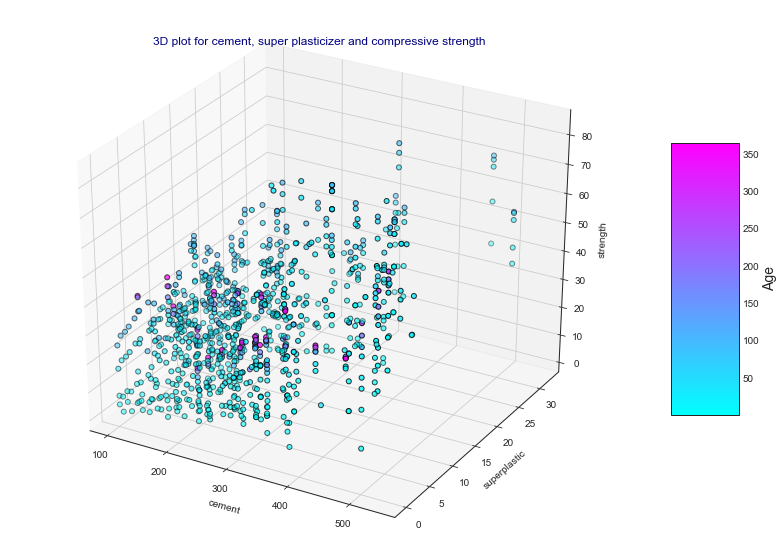

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,10))

ax  = fig.gca(projection = "3d")
#plt.subplot(111,projection = "3d") 

plot =  ax.scatter(data["cement"],
                   data["superplastic"],
                   data["strength"],
           linewidth=1,edgecolor ="k",
           c=data["age"], s=25, cmap="cool")

ax.set_xlabel("cement")
ax.set_ylabel("superplastic")
ax.set_zlabel("strength")

lab = fig.colorbar(plot, shrink=.5, aspect=4)
lab.set_label("Age", fontsize = 14)

plt.title("3D plot for cement, super plasticizer and compressive strength", color="navy")
plt.show()

### Parllell coordinates plot for 3 categories
 - Concrete's compressive strength requirements can vary from 2500 psi (17 MPa) for residential concrete to 4000psi (28 MPa) and higher in commercial structures. Higher strengths upto and exceeding 10,000 psi (70 MPa) are specified for certain applications.

#### Binning compressive strength in 3 categories:
 - category 1 - mpa less than 17.
 - category 2 - mpa in between 17 to 28.
 - category 3 - mpa greater than 28.

In [22]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

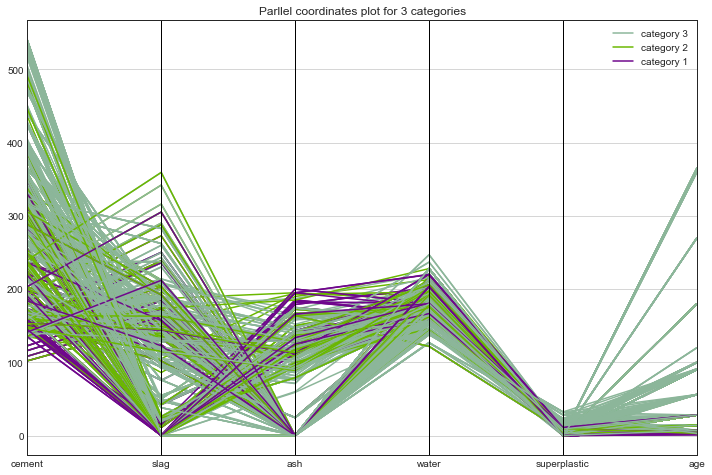

In [23]:
data2  =  data.copy()

def lab(x):
    if x <= 17:
        return "category 1"
    if x >17 and x <= 28 :
        return "category 2"
    if x >28 :
        return "category 3"
    
data2["compressive_strength_category"] = data2.strength.apply(lab)

from pandas.plotting import parallel_coordinates

cols1 = ['cement', 'slag', 'ash', 'water', 'superplastic','age', 'compressive_strength_category']

plt.figure(figsize=(12,8))
parallel_coordinates(data2[cols1],"compressive_strength_category")
plt.title("Parllel coordinates plot for 3 categories")
plt.show()

### Scatter plot between cement and water
 - X - axis = Cement.
 - Y - axis = Strength.
 - COLOR = Water.
 - SIZE = Age

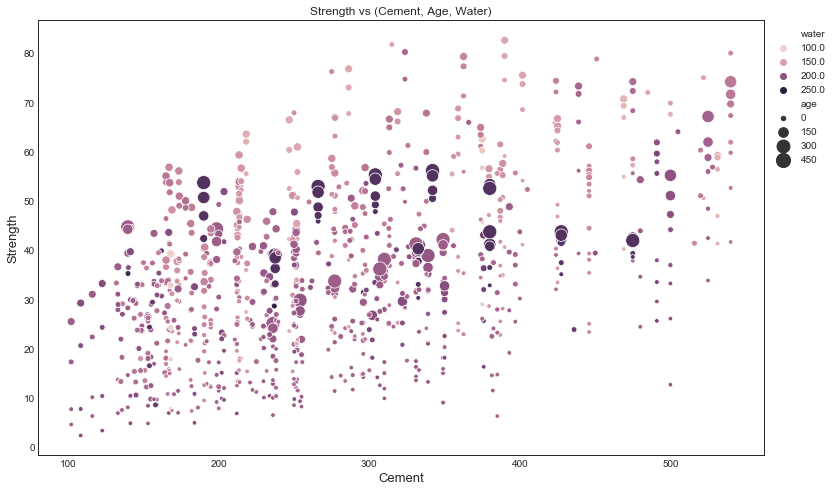

In [24]:
fig, ax = plt.subplots(figsize=(13,8))
sns.scatterplot(y="strength", x="cement", hue="water", size="age", data=data, ax=ax, sizes=(20, 200))
ax.set_title("Strength vs (Cement, Age, Water)")
ax.set_xlabel('Cement', fontsize=13)
ax.set_ylabel('Strength', fontsize=13)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#### Conclusions from Strength vs (Cement, Age, Water):
 - Compressive strength increases with amount of cement
 - Compressive strength increases with age
 - Cement with low age requires more cement for higher strength
 - The older the cement is the more water it requires
 - Concrete strength increases when less water is used in preparing it

### Scatter plot between fineagg and coarseagg.
 - X - axis = fineagg.
 - Y - axis = coarseagg.
 - SIZE = age.
 - COLOR = compressive strength.

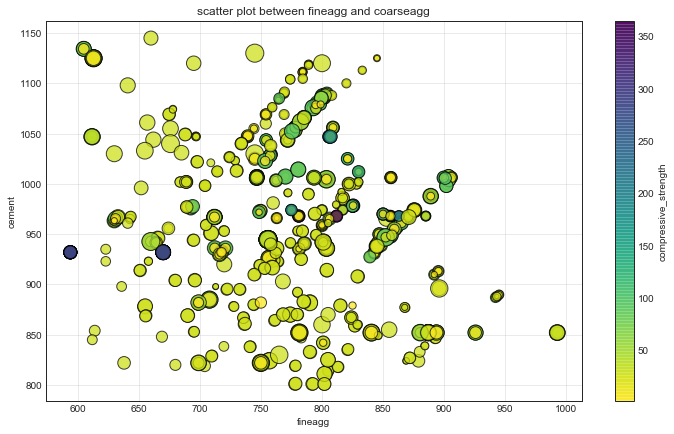

In [25]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
plt.scatter(data["fineagg"],data["coarseagg"],
            c=data["age"],s=data["strength"]*4,
            linewidth=1,edgecolor="k",cmap="viridis_r",  alpha = 0.75)
ax.set_facecolor("w")
ax.set_xlabel("fineagg")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between fineagg and coarseagg")
plt.grid(True,alpha=.5)
plt.show()

Text(0.5, 1.0, 'water - strength')

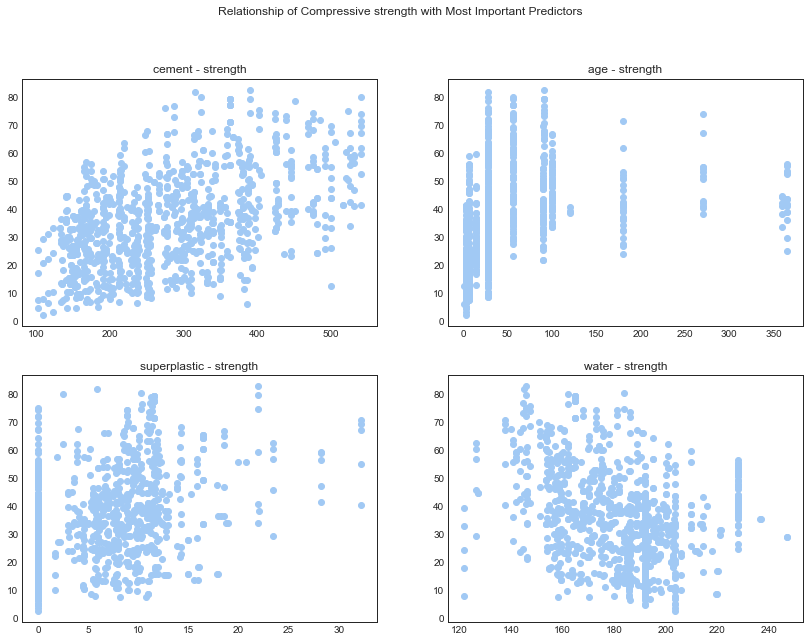

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,10))

fig.suptitle('Relationship of Compressive strength with Most Important Predictors')
ax1.scatter(data['cement'], data['strength'])
ax1.set_title('cement - strength')

ax2.scatter(data['age'], data['strength'])
ax2.set_title('age - strength')

ax3.scatter(data['superplastic'], data['strength'])
ax3.set_title('superplastic - strength')

ax4.scatter(data['water'], data['strength'])
ax4.set_title('water - strength')

# 3. Data Pre-Processing
## 3.1 Creating Helper Classes for Pre-Processing and Model Training

In [27]:
# Helper classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np

class Regressor(object):
    """
    Class representing a regressor. 
    Based on the parameters supplied in the constructor, this class constructs a pipeline object.
    The constructed pipeline adds 
    - Standard scalar if the scale parameter is passed as True
    - Polynomial Feature transformations if the include_polymomial flag is set as True
    """
    def __init__(self, name, model, scale=True, include_polynomial=False, degree=2):
        self.name = name
        self.model = model
        steps = []
        if scale:
            steps.append(('scaler', StandardScaler()))
        if include_polynomial:
            steps.append(('poly_features', PolynomialFeatures(degree=degree)))
        steps.append(('model', model))
        self.steps = steps

    def get_name(self):
        return self.name

    def get_model(self):
        return self.model

    def get(self):
        return Pipeline(steps=self.steps)

    def feature_imp(self):
        try:
            return self.model.feature_importances_
        except AttributeError:
            try:
                return self.model.coef_
            except AttributeError:
                return None


class ModelsBuilder(object):
    '''
    This class is responsible for building the model and constructing a results dataframe.
    It accepts several regressor objects.
    '''
    def __init__(self, regressors, data, target, test_size=0.3, seed=42):
        self.regressors = regressors
        self.split_data = train_test_split(data.drop(target, axis=1), data[target], test_size=test_size, random_state=seed)
        self.data = data
        self.target = target

    def build(self, k_fold_splits=10):
        results = pd.DataFrame(columns=['model', 'training_score', 'test_score', 'k_fold_mean', 'k_fold_std'])
        for regressor in self.regressors:
            regressor.get().fit(self.split_data[0], self.split_data[2])
            cross_vals = cross_val_score(regressor.get(), self.data.drop(self.target, axis=1), self.data[self.target], cv=KFold(n_splits=k_fold_splits))
            mean = round(cross_vals.mean(), 3)
            std = round(cross_vals.std(), 3)
            results = results.append({
                'model': regressor.get_name(),
                'training_score': round(regressor.get().score(self.split_data[0], self.split_data[2]), 3),
                'test_score': round(regressor.get().score(self.split_data[1], self.split_data[3]),3), 
                'k_fold_mean': mean, 
                'k_fold_std': std, 
                '95% confidence intervals': str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))
                }, ignore_index=True)

        return results


class OutliersImputer(SimpleImputer):
    '''
    This class extends the functionality of SimpleImputer to handle outliers.
    '''
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        super().__init__(strategy=strategy)

    def fit(self, X, y=None):
        for i in X.columns:
            q1, q2, q3 = X[i].quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = X[i] > q3 + 1.5*IQR
            b = X[i] < q1 - 1.5*IQR
            X[i] = np.where(a | b, np.NaN, X[i])  
        return super().fit(X, y)

## 3.2 Calculating Feature Importance

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Regressor('Random forest', RandomForestRegressor(random_state=42, max_depth=4), scale=True)
rf_clf = rf_pipeline.get()
rf_clf

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=4, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False))],
         verbose=False)

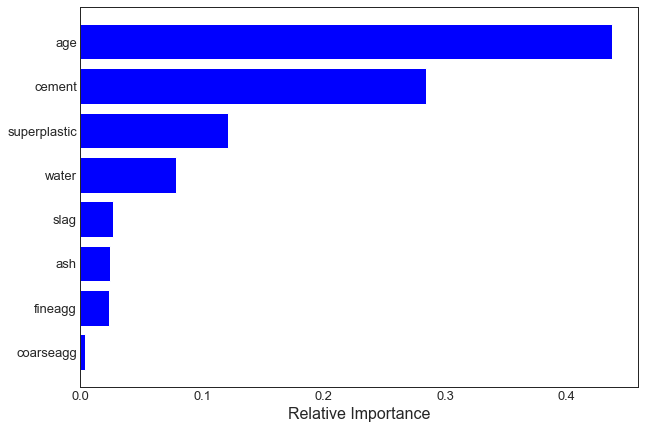

In [29]:
X = data.drop('strength', axis  = 1)
y = data['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_clf.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_pipeline.feature_imp()
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 16)
plt.show()

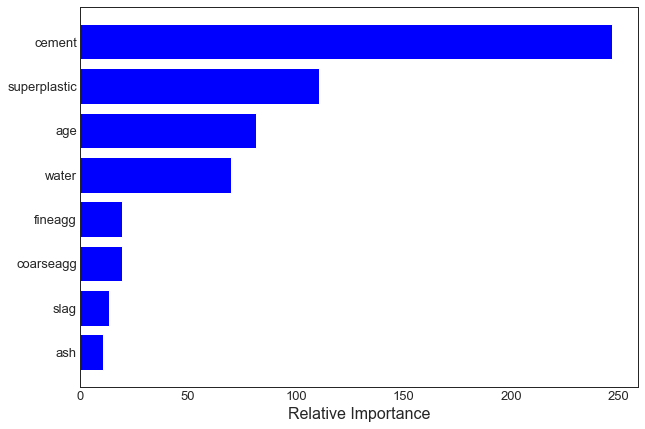

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X_best = SelectKBest(f_regression, k=8).fit(X_train, y_train)

features = list(X_train.columns)
importances = X_best.scores_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 16)
plt.show()

## 3.3 Feature Creation 
### Ratio of Cement to Water per $Kg / m^{3}$
#### Compressive Strength of Concrete
Compressive strength is calculated by dividing the failure load with the area of application of load, usually after 28 days of curing. The strength of concrete is controlled by the proportioning of cement, coarse and fine aggregates, water, and various admixtures. The ratio of the water to cement is the chief factor for determining concrete strength. The lower the water-cement ratio, the higher is the compressive strength.

Source: [Civildigital.com | Compressive Strength of Concrete](https://civildigital.com/compressive-strength-concrete-concrete-cubes/)

In [31]:
create_ratio = lambda row: row.cement/row.water # define a function for the new column
col = data.apply(create_ratio, axis=1) # get column data with an index
data = data.assign(ratio = col.values) # assign values to column 'c'
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0.694349
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1.066961
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1.334045
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1.166667
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0.800828


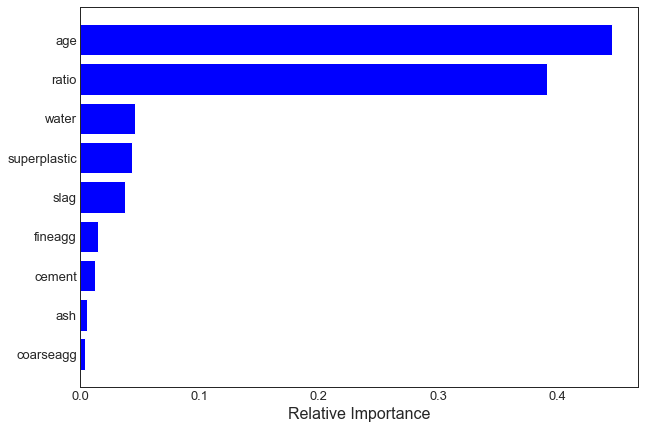

In [32]:
X = data.drop('strength', axis  = 1)
y = data['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_clf.fit(X_train, y_train)

features = list(X_train.columns)
importances = rf_pipeline.feature_imp()
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 16)
plt.show()

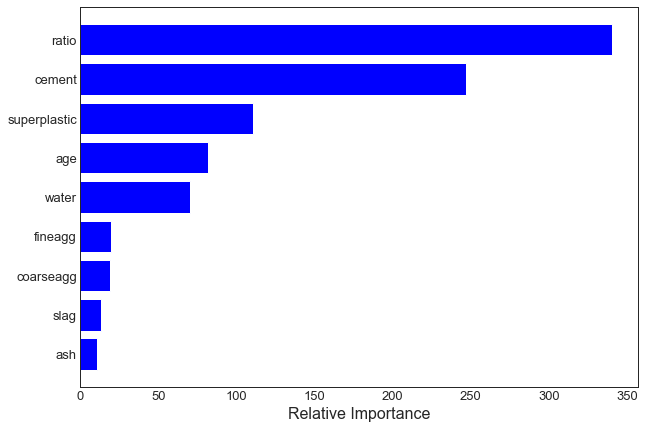

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X_best = SelectKBest(f_regression, k=8).fit(X_train, y_train)

features = list(X_train.columns)
importances = X_best.scores_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 7))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize = 16)
plt.show()